In [ ]:
### Proszę zrunować ten notatnik a na dole jest komander, który automatycznie
# wykona procedury

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

### T_pqr

In [2]:
# Tworzenie grafu pzrez funkcję
def T_pqr(p,q,r):
    G = nx.Graph()
    if p> 1 and q>1 and r >1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

### T_pqr DLA UST. p,q,r o skończonych reprezentacjach

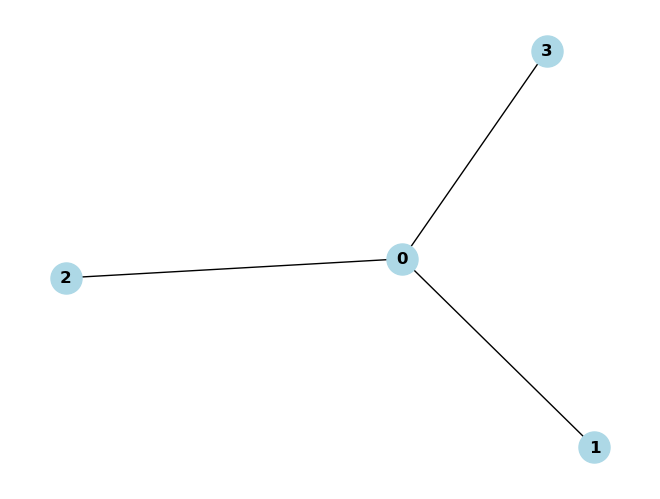

In [3]:
D5 = T_pqr(2,2,2)
labels = {n: D5.nodes[n] for n in D5.nodes}
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

### Przypisywanie wag inicjujących zapis wag

In [7]:
nodes = D5.nodes()
weights = [1,0,0,0]
for node, weight in zip(nodes, weights):
    D5.add_node(node, weight=weight)
for node, weight in D5.nodes(data = 'weight'):
    print(f"node {node} has weight {weight}")

node 0 has weight 1
node 1 has weight 0
node 2 has weight 0
node 3 has weight 0


### WAGI WIERZCHOŁKÓW z listy

In [8]:
def nadawanie_wag(G, wagi_lista):
    wagi = []
    for idx, weight in enumerate(wagi_lista):
        G.add_node(idx, weight=weight) 
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [10]:
nadawanie_wag(D5, [-1,-2,-3,0])

[-1, -2, -3, 0]

### Odbicie do listy

In [7]:
def odbicie(G, node):
    #jeśli chcesz sprawdzić, czy odbicie działa oraz chcesz mieć wypisane wagi, komenda poniżej to umożliwia:
    #print(nadawanie_wag(G, wagi_lista))
    
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['weight']
    G.nodes[node]['weight'] = nowa_waga1
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] -  G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [8]:
odbicie(D5,0)

[1, -3, -4, -1]

### Odbicie z automatu

In [9]:
#### iteruje tak: 0,1,2,3,4,...ostatni_wierzchołek, ,0,1,2,3,4....
def autom1(G):
    wszystkie_wagi = []
    for node in G.nodes():
        odbicie(G, node)
        node_weights = [G.nodes[node]['weight'] for node in G.nodes()]
        wszystkie_wagi.append(node_weights)
        #for node, w in G.nodes(data='waga'):
         #   print(f"Wierzchołek {node} has weight: {w}")
            #print(f"Aplikuję odbicie do wierzchołka:{node}")
        #plt.figure(figsize=(6, 4))
        #pos = nx.spring_layout(G) 
        #nx.draw(G, pos, labels=  node_weights)
        #plt.show()
        return wszystkie_wagi

### Odbijanie z listy

In [10]:
def odbicia_z_listy(G, lista):
    print(nadawanie_wag(G,wagi_lista))
    for node in lista:
        print(odbicie(G, node))

### Eliminacja minusów

In [11]:
wagi_lista = [1,0,0,0]

In [12]:
def pozytywne(G):
    for node, data in G.nodes(data=True):
        if data['weight'] is not None and data['weight'] < 0:
            return False
    return True

In [13]:
def ro_1(G):    
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] -= 1
        weights.append( G.nodes[node]['weight'])
    return weights

In [14]:
# nieefektywnie jedzie po ujemnych wierzchołkach
def zmiana_na_dodatnie(G, count = 0):
    nodes_z_odbiciem = []
    wagi = []
    while True: 
        nodes_ujemne = [node for node, data in G.nodes(data='weight') if data is not None and data < 0]
        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1

        if count > 1000:
            print("Maximum number of iterations reached. Exiting loop.")
            break
        if not nodes_ujemne:
            break
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")

In [15]:
def zmiana_na_dodatniee(G, count=0):
    nodes_z_odbiciem = []
    wagi = []
    
    while True:
        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=False)
        nodes_ujemne = [node for node, data in sorted_nodes if isinstance(data['weight'], (int, float)) and data['weight'] < 0]
        
        if not nodes_ujemne:
            break
        
        for node, data in sorted_nodes:
            if data['weight'] < 0:
                odbicie(G, node)
                nodes_z_odbiciem.append(node)
                count += 1

    for _, w in G.nodes(data='weight'):
        wagi.append(w) 

    print(f"Wierzchołki w kolejności wywoływania: {nodes_z_odbiciem}, wagi na końcu: {wagi}, count: {count}")

In [16]:
def ro_2(G):
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] += 1
        weights.append( G.nodes[node]['weight'])
    return weights

In [17]:
zmiana_na_dodatnie(G, count = 0)

NameError: name 'G' is not defined

### Relacje Knutha

In [ ]:
def relations(tableau):
    rows, cols = tableau.shape
    for i in range(rows):
        for j in range(cols - 1):
            if tableau[i, j] > tableau[i, j + 1]:
                tableau[i, j], tableau[i, j + 1] = tableau[i, j + 1], tableau[i, j]

    for i in range(rows - 1):
        for j in range(cols):
            if j == 0 and tableau[i, j] > tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
            elif tableau[i, j] > tableau[i + 1, j] and tableau[i, j - 1] < tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
    
    return tableau

### Kanoniczne bazy

In [ ]:
def wiersze_relacje(tableau):
    for row in tableau:
        for i in range(len(row)-1):
            if row[i] > row[i + 1]:
                row[i], row[i + 1] = row[i + 1], row[i]
    return tableau

### Eliminacja plusów

In [ ]:
def ujemne(G):
    for node, w in G.nodes(data='weight'):
        if w is not None and w > 0:
            return False
    return True

In [18]:
def zmiana_na_ujemne(G, count = 0):
    nodes_z_odbiciem = []
    wagi = []
    while True: 
        nodes_dodatnie = [node for node, data in G.nodes(data='weight') if data is not None and data > 0]
        for node in nodes_dodatnie:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1

        if count > 1000:
            print("Maximum number of iterations reached. Exiting loop.")
            break
        if not nodes_dodatnie:
            break
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")

In [19]:
def zmiana_na_ujemnee(G, count = 0):
    nodes_z_odbiciem = []
    wagi = []
    while True: 
        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=False)
        nodes_ujemne = [node for node, data in sorted_nodes if isinstance(data['weight'], (int, float)) and data['weight'] < 0]
            for node in nodes_dodatnie:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1

        if count > 1000:
            print("Maximum number of iterations reached. Exiting loop.")
            break
        if not nodes_dodatnie:
            break
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")

IndentationError: unexpected indent (3401296151.py, line 7)

# omijanie miejsc minusów

In [20]:
def omijanie_ujemnych(G, *args, count=0):
    nodes_z_odbiciem = []
    wagi = []
    Y = set(args)  
    while True:
        nodes_dodatnie = [node for node, data in G.nodes(data='weight') if (data is not None and data < 0 and node not in Y)]
        if not nodes_dodatnie:
            break 
        for node in nodes_dodatnie:
            odbicie(G, node)  
            nodes_z_odbiciem.append(node)
            count += 1
            if count > 1000:  
                print("Maximum number of iterations reached. Exiting loop.")
                break
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")


In [21]:
def omijanie_ujemnych(G, *args, count=0):
    nodes_z_odbiciem = []
    wagi = []
    Y = set(args)  
    while True:
        nodes_dodatnie = [node for node, data in G.nodes(data='weight') if (data is not None and data < 0 and node not in Y)]
        if not nodes_dodatnie:
            break 
        for node in nodes_dodatnie:
            odbicie(G, node)  
            nodes_z_odbiciem.append(node)
            count += 1
            if count > 1000:  
                print("Maximum number of iterations reached. Exiting loop.")
                break
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")


### Omijanie miejsc plusów

In [24]:
def omijanie_dodatnich(G, *args, count=0):
    nodes_z_odbiciem = []
    wagi = []
    Y = set(args)  
    while True:
        nodes_dodatnie = [node for node, data in G.nodes(data='weight') if (data is not None and data > 0 and node not in Y)]
        if not nodes_dodatnie:
            break 
        for node in nodes_dodatnie:
            odbicie(G, node)  
            nodes_z_odbiciem.append(node)
            count += 1
            if count > 1000:  
                print("Maximum number of iterations reached. Exiting loop.")
                break
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")


### Do komandera

In [36]:
graph = T_pqr(10,5,2)
nadawanie_wag(graph,(1,2,3,4,5,6,7,8,9,0,1,2,3,4,5))
odbijanie = autom1(graph)

In [40]:
with open('graph_data.pkl', 'wb') as f:
    pickle.dump((graph, odbijanie), f)

# Odczytanie danych z pliku
with open('graph_data.pkl', 'rb') as f:
    loaded_graph, loaded_shortest_paths = pickle.load(f)

In [42]:
loaded_shortest_paths

[[-1, 3, 3, 4, 5, 6, 7, 8, 9, 0, 2, 2, 3, 4, 6]]